# Recommended reading


* Think Bayes: Bayesian Statistics in Python by Allen B. Downey
* Information Theory, Inference and Learning Algorithms by David J. C. MacKay



# Definitions

**Joint probability** $p(a,b)$

a, b are independent random variables if and only if $p(a,b) = p(a)p(b)$

**Marginal probability** $p(a) = \sum_b {p(a,b)}$

If b is a continuous variable, sum is replaced by an integral. 
Sum or integral operation is also called **marginalization**

**Conditional probability** $p(a~|~b) = \frac{p(a,b)}{p(b)}$

From this follows that $p(a,b) = p(a~|~b)~p(b) = p(b~|~a)~p(a)$ and Bayes' theorem in classic form:

$$p(a~|~b) = \frac{p(b~|~a)~p(a)}{p(b)}$$

**Probability** is a degree of *belief*  in a proposition

# Example 1

Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

$$ p(bowl~1~|~vanilla) = \frac{p(vanilla~|~bowl~1)~p(bowl~1)}{p(vanilla)}  = 
\frac{\frac{3}{4} \frac{1}{2}}{\frac{5}{8}} = \frac{3}{5} $$



# Bayesian data modeling

Model $\mathscr{H}$ is set of assumptions on which probability is based.

$$ p(model~parameters~|~data, model~type) = 
\frac {p(data~|~model~type, model~parameters)~p(model~type, model~parameters)} 
{p(data~|~model~type)} $$

$ p(model~type, model~parameters) $ is called **prior probability** or **prior beliefs**

$ p(model~parameters~|~data, model~type)$ is called **posterior probability** or **posterior beliefs**

$ p(data~|~model~type, model~parameters) $ is called **likelihood** of the parameters given the data

$ p(data~|~model~type) = \sum_{model~parameters} {p(data~|~model~type, model~parameters)~p(model~type, model~parameters)} $ is called **evidence** and is a normalizing constant


## Example 2
You toss a coin, it is heads. What is the probability that it will be heads in the second toss?

To model a coin we will use Bernoulli distribution https://en.wikipedia.org/wiki/Bernoulli_distribution.
It has one parameter q, which is the probability of heads. Then the likelihood function based on one trial is:

$$p(d~|~q) = q^d~(1-1)^{1-d}$$

Where d is 1 if it is head and 0 if tails, and q is the unknown parameter of Bernoulli distribution.

Uniform prior: when we do not have any prior beliefs about the parameter q, so any value of $q \in [0,1]$ is equally likely

$$p(q) = 1 $$

Posterior distribution in this case is:

$$p(q~|~d) \propto p(d~|~q) = q^d~(1-1)^{1-d}$$

In our case d = 1, and we also add normalization constant:

$$ p(q~|~d=1) = 2q$$

We will plot it:

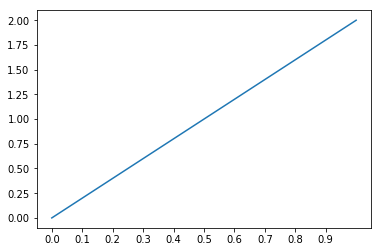

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (15,10)
fig, ax = plt.subplots(1, 1)
q = np.linspace(0, 1, 1000)
ax.xaxis.set_ticks(np.arange(0, 1.0, 0.1))
ax.plot(q, 2*q);


Your next coin:

$$ p(d2=1~|~d1=1) = \int_{q=0}^{1}p(d2=1, q~|~d1=1)dq = \int_{q=0}^{1}p(d2=1~|~q)~p(q~|~d1=1)dq  = \int_{q=0}^{1}q\cdot2q~dq = \frac{2}{3} $$ 

The uniform prior we chose is an example of **Uninformative prior**. Another type of prior is **Informative prior**, reflecting our specific prior believes and perhaps prior experience. See https://en.wikipedia.org/wiki/Prior_probability for more discussion. 

When choosing a prior it is always convenient to choose a **Conjugate prior** https://en.wikipedia.org/wiki/Conjugate_prior. In this case the posterior distribution is of the same type as a prior distribution. 

In our case for Bernoulli distribution the conjugate prior is Beta Distribution https://en.wikipedia.org/wiki/Beta_distribution, which has two parameters: $\alpha$ and $\beta$:

$$ p(q) = \frac{q^{\alpha-1} (1-q)^{\beta-1}}{B(\alpha, \beta)} $$

The 'fair' coin may be described by this prior distribution:

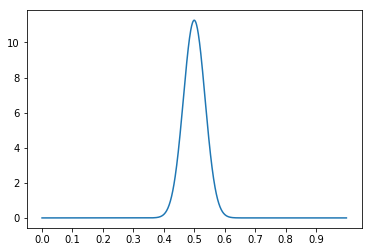

In [3]:
from scipy.stats import beta
fig, ax = plt.subplots(1, 1)
q = np.linspace(0, 1, 1000)
ax.xaxis.set_ticks(np.arange(0, 1.0, 0.1))
ax.plot(q, beta.pdf(q, 100, 100));

In this case the solution to the question above will be much closer to 0.5, although still higher than 0.5

To answer the question "Is the coin fair?" we should compare the value of the evidence (the denominator in the Bayes' theorem) of the two models $\mathscr{H}_0$ and $\mathscr{H}_1$ (No p-testing is required!). See https://en.wikipedia.org/wiki/Bayes_factor for more information. Bayesian methods often selects simpler models with fewer parameters. Occam's razor.

# Machine Learning

Common loss functions can be derived from the posterior distributions by taking negative log

For linear regression:

$$y = b + wx + (white~noise) $$

The likelihood function:

$$ p(data|parameters) \propto \prod_i exp\big(-\frac{(y^{(i)}-b-wx^{(i)})^2}{2\sigma^2}\big)$$

The prior distribution for parameter w:

$$ p(w) \propto exp\big(-\frac{\lambda w^2}{2\sigma^2}\big)$$

Loss function is a negative log:

$$ \mathscr{L} = -log(posterior) \propto \sum_i(y^{(i)}-b-wx^{(i)})^2 + \lambda w^2$$

This is a loss function of linear regression with L2 regularization

In a similar way, by taking negative log of the Bernoulli distribution we get the cost function for the classification problem:

$$ \mathscr{L}  \propto \sum_i(-y^{(i)}log q-(1-y^{(i)})~log (1-q)) $$

Minimizing loss function is the same as maximizing posterior distribution (or likelihood in case when prior is uninformative). 